In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('../data/processed/dept35_22.csv')
df.head()

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
0,163320,22,1,1,38.97,3.0,22.06,3.0
1,163320,22,1,5,25.98,2.0,27.03,4.0
2,163320,22,1,6,38.97,3.0,14.79,2.0
3,163320,22,1,7,25.98,2.0,34.20,5.0
4,163320,22,1,8,25.98,2.0,41.27,6.0


In [3]:
df.sample(5)

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
127351,554862,22,6,43,23.96,4.0,63.55,25.0
450625,626759,22,11,55,0.00,0.0,140.15,9.0
229379,585953,22,5,41,0.00,0.0,23.42,4.0
525820,632003,22,12,23,0.00,0.0,26.35,3.0
329556,607017,22,7,55,0.00,0.0,-0.01,0.0


#### A default model is fine, keep it simple

In [5]:
%%time

X = df.drop('Total Units Sold', axis=1)
y = df['Total Units Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f'XGBoost RMSE: {round(np.sqrt(mean_squared_error(y_test, predictions)), 3)}')
print(f'XGBoost R^2: {round(r2_score(y_test, predictions), 3)} \n')

XGBoost RMSE: 0.449
XGBoost R^2: 0.968 

CPU times: user 1min 19s, sys: 1.43 s, total: 1min 21s
Wall time: 7.06 s


#### Below is random sampling of X and y

In [3]:
test_23 = df.sample(frac=1)
test_23['Year Number'] = 23

new_X = test_23.drop('Total Units Sold', axis=1)
new_y = test_23['Total Units Sold']

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model.fit(new_X_train, new_y_train)

predictions = model.predict(new_X_test)

print(f'XGBoost RMSE: {round(np.sqrt(mean_squared_error(new_y_test, predictions)), 3)}')
print(f'XGBoost R^2: {round(r2_score(new_y_test, predictions), 3)} \n')

XGBoost RMSE: 0.508
XGBoost R^2: 0.962 



---

<AxesSubplot:xlabel='Month Number', ylabel='Total Units Sold'>

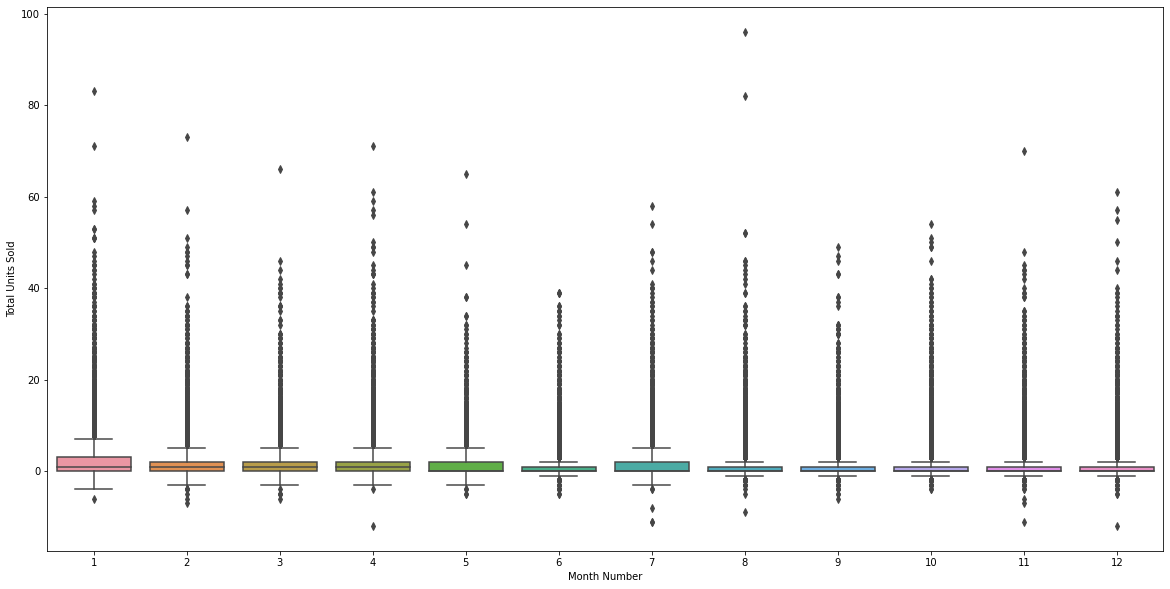

In [4]:
plt.figure(figsize=(20, 10))

sns.boxplot(data = df, x = 'Month Number', y = 'Total Units Sold')

In [53]:
df[(df['Sku Number'] == 41226) & (df['Month Number'] == 2) & (df['Store Number'] == 41)]

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
40808,41226,22,2,41,120.54,46.0,175.68,149.0


<AxesSubplot:ylabel='Total Units Sold'>

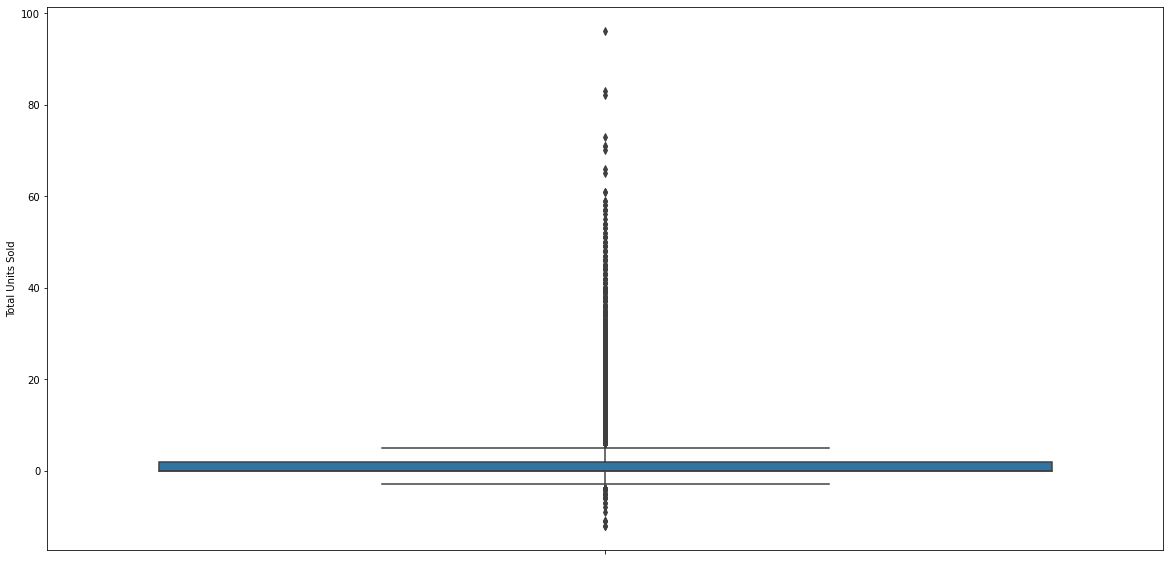

In [7]:
plt.figure(figsize=(20, 10))

sns.boxplot(data = df, y = 'Total Units Sold')

In [39]:
q1 = np.quantile(df['Total Units Sold'], 0.25)
q3 = np.quantile(df['Total Units Sold'], 0.75)
iqr = q3 - q1

In [42]:
iqr

2.0

In [47]:
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

In [38]:
df[df['Total Units Sold'] > 20]

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
1607,227374,22,1,8,62.79,21.0,37.16,28.0
1610,227374,22,1,17,68.77,23.0,18.64,14.0
1617,227374,22,1,28,62.79,21.0,18.89,14.0
1624,227374,22,1,39,74.75,25.0,44.66,33.0
1629,227374,22,1,46,104.65,35.0,107.42,81.0
...,...,...,...,...,...,...,...,...
590016,635839,22,5,52,229.77,23.0,129.86,25.0
590037,635839,22,6,47,219.78,22.0,84.48,16.0
597223,639994,22,12,58,98.67,33.0,16.16,15.0
598220,640003,22,12,39,71.76,24.0,142.90,126.0


In [ ]:
dataset.loc[dataset['target variable'] > upper_bound, 'target variable'] = upper_limit
dataset.loc[dataset['target variable'] < Lower_bound, 'target variable'] = Lower_limit

In [52]:
df.loc[df['Total Units Sold'] > upper, 'Total Units Sold']

7          6.0
22         7.0
29         7.0
30         6.0
74        10.0
          ... 
599499     6.0
599562     7.0
599796    15.0
599827     7.0
600042     6.0
Name: Total Units Sold, Length: 29770, dtype: float64

#### There are so many outliers but generally units sold stay between 0-5

In [54]:
df[df['Month Number'] == 2].head()

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
34,163320,22,2,1,25.98,2.0,7.67,1.0
35,163320,22,2,5,0.00,0.0,28.20,4.0
36,163320,22,2,6,0.00,0.0,15.44,2.0
37,163320,22,2,7,12.99,1.0,28.55,4.0
38,163320,22,2,8,51.96,4.0,14.36,2.0


In [57]:
df.head()

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
0,163320,22,1,1,38.97,3.0,22.06,3.0
1,163320,22,1,5,25.98,2.0,27.03,4.0
2,163320,22,1,6,38.97,3.0,14.79,2.0
3,163320,22,1,7,25.98,2.0,34.20,5.0
4,163320,22,1,8,25.98,2.0,41.27,6.0


In [91]:
def make_prediction(sku_number, year, month, store_number, total_sales, oh_inv_cost, oh_inv_units):
    pred_df = pd.DataFrame([[sku_number, year, month, store_number, total_sales, oh_inv_cost, oh_inv_units]], columns = X.columns)
    print(f"Predicted # Units Sold for:\nSKU: {sku_number}\nYear: {year}\nMonth: {month}\n\n# Units Sold: {np.round(model.predict(pred_df)) + 1}")

In [93]:
make_prediction(163320, 23, 1, 7, 12.99, 28.55, 4.0)

Predicted # Units Sold for:
SKU: 163320
Year: 23
Month: 1

# Units Sold: [2.]


In [27]:
df.sample(5)

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
332391,607033,22,10,36,0.00,0.0,27.81,2.0
362070,611708,22,12,41,7.99,1.0,181.34,56.0
51506,446697,22,1,23,0.00,0.0,47.89,6.0
229949,585955,22,8,58,39.96,4.0,90.32,14.0
549229,633776,22,9,52,109.89,11.0,6.08,1.0


In [31]:
jan_X = df[(df['Month Number'] == 8) & (df['Sku Number'] == 633775)].drop('Total Units Sold', axis=1)
jan_y = df[(df['Month Number'] == 8) & (df['Sku Number'] == 633775)]['Total Units Sold']

In [9]:
jan_X.head()

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total OH Inventory Cost,Total OH Inventory Unit
124309,547091,22,1,1,0.00,120.68,36.0
124310,547091,22,1,5,7.99,26.82,8.0
124311,547091,22,1,6,0.00,30.17,9.0
124312,547091,22,1,7,31.96,60.34,18.0
124313,547091,22,1,8,0.00,33.52,10.0


In [10]:
jan_y.head()

124309    0.0
124310    1.0
124311    0.0
124312    4.0
124313    0.0
Name: Total Units Sold, dtype: float64

In [32]:
df[(df['Month Number'] == 8) & (df['Sku Number'] == 633775)]

,Sku Number,Year Number,Month Number,Store Number,Total Sales,Total Units Sold,Total OH Inventory Cost,Total OH Inventory Unit
548795,633775,22,8,1,189.81,19.0,77.64,13.0
548796,633775,22,8,5,99.90,10.0,81.80,14.0
548797,633775,22,8,6,79.92,8.0,17.55,3.0
548798,633775,22,8,7,59.94,6.0,54.28,9.0
548799,633775,22,8,8,19.98,2.0,12.66,2.0
548800,633775,22,8,11,49.95,5.0,31.87,5.0
548801,633775,22,8,14,19.98,2.0,52.23,8.0
548802,633775,22,8,17,329.67,33.0,481.92,77.0
548803,633775,22,8,20,69.93,7.0,53.85,9.0
548804,633775,22,8,23,119.88,12.0,53.55,9.0


In [33]:
print('Predicted vs. Actual: Difference/Error')
print('-' * 40)
for x in range(len(jan_X.index)):
    prediction = np.round(model.predict(pd.DataFrame([jan_X.iloc[x]])))
    print(prediction, '\t\t', jan_y.iloc[x], '\t\t', prediction - jan_y.iloc[x])
    # print(prediction+1, '\t\t', jan_y.iloc[x], '\t\t', prediction+1 - jan_y.iloc[x])

Predicted vs. Actual: Difference/Error
----------------------------------------
[18.] 		 19.0 		 [-1.]
[10.] 		 10.0 		 [0.]
[8.] 		 8.0 		 [0.]
[5.] 		 6.0 		 [-1.]
[2.] 		 2.0 		 [0.]
[4.] 		 5.0 		 [-1.]
[2.] 		 2.0 		 [0.]
[33.] 		 33.0 		 [0.]
[6.] 		 7.0 		 [-1.]
[12.] 		 12.0 		 [0.]
[14.] 		 15.0 		 [-1.]
[14.] 		 14.0 		 [0.]
[15.] 		 16.0 		 [-1.]
[45.] 		 43.0 		 [2.]
[20.] 		 24.0 		 [-4.]
[20.] 		 21.0 		 [-1.]
[22.] 		 22.0 		 [0.]
[20.] 		 21.0 		 [-1.]
[13.] 		 15.0 		 [-2.]
[12.] 		 13.0 		 [-1.]
[13.] 		 13.0 		 [0.]
[81.] 		 82.0 		 [-1.]
[0.] 		 0.0 		 [0.]
[-0.] 		 0.0 		 [-0.]
[11.] 		 11.0 		 [0.]
[-0.] 		 0.0 		 [-0.]
[6.] 		 6.0 		 [0.]
[8.] 		 7.0 		 [1.]
[8.] 		 8.0 		 [0.]
[3.] 		 4.0 		 [-1.]
[0.] 		 0.0 		 [0.]
[16.] 		 16.0 		 [0.]
[13.] 		 14.0 		 [-1.]
[16.] 		 17.0 		 [-1.]
[9.] 		 10.0 		 [-1.]
[4.] 		 4.0 		 [0.]
[3.] 		 3.0 		 [0.]
[4.] 		 4.0 		 [0.]
